<a href="https://colab.research.google.com/github/Joao-Tolentino/lia1_2024_1/blob/main/Entregas-Joao-Tolentino/Ci%C3%AAncia_de_Dados_INPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ciência de Dados - INPA (Instituto Nacional De Pesquisas Da Amazônia)**

O Dataset da INPA possui os projetos em aberto do INPA, além de diversas outras informações relacionadas, as quais vamos ver ademais. O Dataset possui 106 linhas e 7 colunas, das quais 2 colunas possuem um valor único para cada linha.

**Serão 2 perguntas e 1 desafio! #borafazer**

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [18]:
# Carrega o dataset
df_ss = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INPA/projetos_de_pesquisa.csv')

In [19]:
# Shape
df_ss.shape

(106, 7)

In [42]:
# Amostra dos dados
df_ss.head()

,Codigo,Projeto,Gestor,Classificacao,Unidade,Inicio_Previsto,Termino_Previsto
0,PRJ05.80,INPA/Smithsonian - Projeto Dinamica Biologica ...,Rita de Cássia Guimarães Mesquita,Pesquisa e Desenvolvimento,COEXT,1979-10-01,2024-03-05
1,PRJ05.124,Sucessão ecológica em áreas degradadas da Amaz...,Rita de Cássia Guimarães Mesquita,Pesquisa e Desenvolvimento,COEXT,2006-01-03,2025-12-31
2,PRJ06.216,Chamada MCTIC/CNPqNº 28/2018 - Universal/Faixa...,Rosemary Aparecida Roque,Pesquisa e Desenvolvimento,COSBE,2019-02-18,2023-02-28
3,PRJ06.218,MCTIC/CNPq 28/2018  Universal/Faixa A - Diagn...,Maurício Morishi Ogusku,Pesquisa e Desenvolvimento,COSBE,2019-02-12,2023-02-28
4,PRJ06.220,CAPES - Rede de cooperação acadêmica em intera...,Gemilson Soares Pontes,Pesquisa e Desenvolvimento,COSBE,2018-12-12,2023-12-12


In [21]:
# Novos nomes de colunas
novas_colunas = {'Código': 'Codigo','Classificação': 'Classificacao',
       'Início previsto': 'Inicio_Previsto', 'Término previsto': 'Termino_Previsto'}

# Rename columns
df_ss.rename(columns=novas_colunas, inplace=True)

In [43]:
# Converte a coluna de Inicio Previsto para um datetime dtype
df_ss['Inicio_Previsto'] = pd.to_datetime(df_ss['Inicio_Previsto'], format='%Y/%m/%d')

# Converte a coluna de Termino Previsto para um datetime dtype
df_ss['Termino_Previsto'] = pd.to_datetime(df_ss['Termino_Previsto'], format='%Y/%m/%d')

In [22]:
# Colunas do conjunto de dados
df_ss.columns

Index(['Codigo', 'Projeto', 'Gestor', 'Classificacao', 'Unidade',
       'Inicio_Previsto', 'Termino_Previsto'],
      dtype='object')

In [23]:
# Verificando o tipo de dado de cada coluna
df_ss.dtypes

Codigo              object
Projeto             object
Gestor              object
Classificacao       object
Unidade             object
Inicio_Previsto     object
Termino_Previsto    object
dtype: object

In [24]:
# Verificando se há registros duplicados
df_ss[df_ss.duplicated()]

,Codigo,Projeto,Gestor,Classificacao,Unidade,Inicio_Previsto,Termino_Previsto


In [25]:
# Verificando de há valores ausentes
df_ss.isnull().sum()

Codigo              0
Projeto             0
Gestor              0
Classificacao       0
Unidade             0
Inicio_Previsto     0
Termino_Previsto    0
dtype: int64

## **1. Qual Unidade com maior quantidade de Pesquisa e Desenvolvimento?**

In [167]:
# Primeiro filtramos o dataframe com os registros que desejamos e os agrupamos
total_unidade = df_ss.groupby('Classificacao')['Unidade'].value_counts().reset_index()

In [168]:
# Então encontramos a unidade com maior número de Pesquisas
unidade_maior_qnt_pesq = total_unidade['Unidade'].iloc[0]
print("Unidade com maior quantidade de Pesquisas e Desenvolvimento:", unidade_maior_qnt_pesq)

Unidade com maior quantidade de Pesquisas e Desenvolvimento: COBIO


In [169]:
#Checando o resultado
total_unidade

,Classificacao,Unidade,count
0,Pesquisa e Desenvolvimento,COBIO,34
1,Pesquisa e Desenvolvimento,CGCE,27
2,Pesquisa e Desenvolvimento,CODUT,22
3,Pesquisa e Desenvolvimento,COSBE,13
4,Pesquisa e Desenvolvimento,COAES,3
5,Pesquisa e Desenvolvimento,COEXT,3
6,Pesquisa e Desenvolvimento,DIPO3,2
7,Pesquisa e Desenvolvimento,SEPCB,2


## **2. Qual o total de Pesquisas com início previsto para antes de 2018?**
Apresente o resultado em um gráfico de Pizza

In [50]:
#Adicionando uma nova coluna para usar no gráfico
df_ss['Qnt_Pesquisa'] = 1

In [51]:
#Criando um novo Dataframe somente com as pesquisas com inicio previsto para antes de 2018
total_iniciadas_antes_2018 = df_ss.loc[df_ss['Inicio_Previsto'].dt.year < 2018]

#Checar o dataframe criado
total_iniciadas_antes_2018

,Codigo,Projeto,Gestor,Classificacao,Unidade,Inicio_Previsto,Termino_Previsto,Qnt_Pesquisa
0,PRJ05.80,INPA/Smithsonian - Projeto Dinamica Biologica ...,Rita de Cássia Guimarães Mesquita,Pesquisa e Desenvolvimento,COEXT,1979-10-01,2024-03-05,1
1,PRJ05.124,Sucessão ecológica em áreas degradadas da Amaz...,Rita de Cássia Guimarães Mesquita,Pesquisa e Desenvolvimento,COEXT,2006-01-03,2025-12-31,1
11,PRJ12.421,Turismo sustentável para a preservação do gavi...,Tânia Margarete Sanaiotti,Pesquisa e Desenvolvimento,COBIO,2016-10-01,2023-12-31,1
12,PRJ12.433,CHAMADA INCT  MCTI/CNPq/CAPES/FAPs nº 16/2014...,Adalberto Luis Val,Pesquisa e Desenvolvimento,COBIO,2016-11-26,2024-12-19,1
57,PRJ14.150,Bancos de Germoplasma de Pupunha,Charles Roland Clement,Pesquisa e Desenvolvimento,CGCE,2016-01-01,2023-06-30,1
58,PRJ14.158,Instituto Nacional de Ciência Tecnologia - Red...,Sérgio Massayoshi Nunomura,Pesquisa e Desenvolvimento,CGCE,2016-11-30,2024-11-30,1
59,PRJ14.159,CHAMADA INCT  MCTI/CNPq/CAPES/FAPs nº 16/2014...,Niro Higuchi,Pesquisa e Desenvolvimento,CODUT,2016-10-01,2022-11-30,1
85,PRJ15.93,FINEP-Rede de Monitoramento de gases de efeito...,Carlos Alberto Nobre Quesada,Pesquisa e Desenvolvimento,CODUT,2011-09-19,2022-12-31,1
86,PRJ15.145,Natural Environment Research Council (NERC) - ...,Carlos Alberto Nobre Quesada,Pesquisa e Desenvolvimento,CODUT,2014-10-01,2024-12-31,1
87,PRJ15.157,Programa de Grande Escala da Biosfera-Atmosfer...,Hillândia Brandão da Cunha,Pesquisa e Desenvolvimento,COAES,2007-01-01,2023-12-31,1


In [73]:
#Arruma o dataframe para ordem crescente de datas
total_iniciadas_antes_2018 = total_iniciadas_antes_2018.sort_values(by='Inicio_Previsto')

#Checar o dataframe
total_iniciadas_antes_2018

,Codigo,Projeto,Gestor,Classificacao,Unidade,Inicio_Previsto,Termino_Previsto,Qnt_Pesquisa
0,PRJ05.80,INPA/Smithsonian - Projeto Dinamica Biologica ...,Rita de Cássia Guimarães Mesquita,Pesquisa e Desenvolvimento,COEXT,1979-10-01,2024-03-05,1
1,PRJ05.124,Sucessão ecológica em áreas degradadas da Amaz...,Rita de Cássia Guimarães Mesquita,Pesquisa e Desenvolvimento,COEXT,2006-01-03,2025-12-31,1
87,PRJ15.157,Programa de Grande Escala da Biosfera-Atmosfer...,Hillândia Brandão da Cunha,Pesquisa e Desenvolvimento,COAES,2007-01-01,2023-12-31,1
85,PRJ15.93,FINEP-Rede de Monitoramento de gases de efeito...,Carlos Alberto Nobre Quesada,Pesquisa e Desenvolvimento,CODUT,2011-09-19,2022-12-31,1
86,PRJ15.145,Natural Environment Research Council (NERC) - ...,Carlos Alberto Nobre Quesada,Pesquisa e Desenvolvimento,CODUT,2014-10-01,2024-12-31,1
88,PRJ15.166,AMAZON FACE  Avaliação dos efeitos do aumento...,Carlos Alberto Nobre Quesada,Pesquisa e Desenvolvimento,CODUT,2015-12-02,2024-12-01,1
57,PRJ14.150,Bancos de Germoplasma de Pupunha,Charles Roland Clement,Pesquisa e Desenvolvimento,CGCE,2016-01-01,2023-06-30,1
89,PRJ15.171,Next Generation Ecosystem Experiments - Tropic...,Niro Higuchi,Pesquisa e Desenvolvimento,CODUT,2016-01-01,2025-12-31,1
59,PRJ14.159,CHAMADA INCT  MCTI/CNPq/CAPES/FAPs nº 16/2014...,Niro Higuchi,Pesquisa e Desenvolvimento,CODUT,2016-10-01,2022-11-30,1
11,PRJ12.421,Turismo sustentável para a preservação do gavi...,Tânia Margarete Sanaiotti,Pesquisa e Desenvolvimento,COBIO,2016-10-01,2023-12-31,1


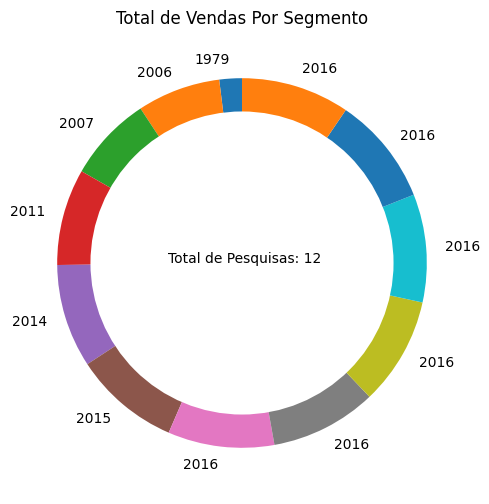

In [67]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(total_iniciadas_antes_2018['Inicio_Previsto'],
        labels = total_iniciadas_antes_2018['Inicio_Previsto'].dt.year,
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Pesquisas: ' + str(sum(total_iniciadas_antes_2018['Qnt_Pesquisa'])), xy = (-0.4, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

## **Desafio 1 - Nível Deus dos Dataframes**

Agrupe as pesquisas por Gestor e apresente um gráfico, de sua preferência, com o nome do Gestor ("Ultimo_sobrenome; Primeiro_nome") assim como quantas pesquisas ele está desenvolvendo.

In [104]:
#Arruma o dataframe por nome usando o ASCII
df_ordenado = df_ss.sort_values(by='Gestor')

#Checar o dataframe
df_ordenado

,Codigo,Projeto,Gestor,Classificacao,Unidade,Inicio_Previsto,Termino_Previsto,Qnt_Pesquisa
34,PRJ12.510,ENGIE - Desenvolvimento e Aplicação de Ferrame...,Adalberto Luis Val,Pesquisa e Desenvolvimento,COBIO,2022-06-01,2024-12-01,1
27,PRJ12.502,Edital N. 001/2020 - FAPESP/FAPEAM - Cadeias p...,Adalberto Luis Val,Pesquisa e Desenvolvimento,COBIO,2021-04-20,2023-07-16,1
12,PRJ12.433,CHAMADA INCT  MCTI/CNPq/CAPES/FAPs nº 16/2014...,Adalberto Luis Val,Pesquisa e Desenvolvimento,COBIO,2016-11-26,2024-12-19,1
102,PRJ15.198,Chamada CNPq Nº 04/2021 - Bolsa de Produtivida...,Adriano José Nogueira Lima,Pesquisa e Desenvolvimento,CODUT,2022-03-14,2025-03-14,1
101,PRJ15.197,Edital Universal CNPq/MCTI/FNDCT N° 18/2021 - ...,Adriano José Nogueira Lima,Pesquisa e Desenvolvimento,CODUT,2022-03-14,2025-03-14,1
...,...,...,...,...,...,...,...,...
54,PRJ12.531,AMPA e Eletronorte/Eletrobrás - Soltura e moni...,Vera Maria Ferreira da Silva,Pesquisa e Desenvolvimento,COBIO,2022-01-01,2027-12-31,1
36,PRJ12.512,Uma análise comparativa de estrutura e composi...,Vera Maria Ferreira da Silva,Pesquisa e Desenvolvimento,COBIO,2018-08-01,2023-12-31,1
23,PRJ12.492,Chamada CNPq/MCTI/CONFAP-FAPS/PELD nº 21/2020 ...,William Ernest Magnusson,Pesquisa e Desenvolvimento,COBIO,2021-01-01,2023-09-30,1
49,PRJ12.526,Edital Nº 007/2021 - BIODIVERSA/FAPEAM - Biodi...,William Ernest Magnusson,Pesquisa e Desenvolvimento,COBIO,2021-12-02,2023-09-14,1


In [105]:
# Define uma função para modificar os nomes para o formato Ultimo_Sobrenome - Primeiro_Nome
def modificador_nomes(text):
    partes = text.split(' ')
    retornavel = partes[-1] + "; " + partes[0]
    return retornavel

# Apply the custom function to the 'Text' column
df_ordenado['Gestor'] = df_ordenado['Gestor'].apply(modificador_nomes)

#Checar o dataframe
df_ordenado

,Codigo,Projeto,Gestor,Classificacao,Unidade,Inicio_Previsto,Termino_Previsto,Qnt_Pesquisa
34,PRJ12.510,ENGIE - Desenvolvimento e Aplicação de Ferrame...,Val; Adalberto,Pesquisa e Desenvolvimento,COBIO,2022-06-01,2024-12-01,1
27,PRJ12.502,Edital N. 001/2020 - FAPESP/FAPEAM - Cadeias p...,Val; Adalberto,Pesquisa e Desenvolvimento,COBIO,2021-04-20,2023-07-16,1
12,PRJ12.433,CHAMADA INCT  MCTI/CNPq/CAPES/FAPs nº 16/2014...,Val; Adalberto,Pesquisa e Desenvolvimento,COBIO,2016-11-26,2024-12-19,1
102,PRJ15.198,Chamada CNPq Nº 04/2021 - Bolsa de Produtivida...,Lima; Adriano,Pesquisa e Desenvolvimento,CODUT,2022-03-14,2025-03-14,1
101,PRJ15.197,Edital Universal CNPq/MCTI/FNDCT N° 18/2021 - ...,Lima; Adriano,Pesquisa e Desenvolvimento,CODUT,2022-03-14,2025-03-14,1
...,...,...,...,...,...,...,...,...
54,PRJ12.531,AMPA e Eletronorte/Eletrobrás - Soltura e moni...,Silva; Vera,Pesquisa e Desenvolvimento,COBIO,2022-01-01,2027-12-31,1
36,PRJ12.512,Uma análise comparativa de estrutura e composi...,Silva; Vera,Pesquisa e Desenvolvimento,COBIO,2018-08-01,2023-12-31,1
23,PRJ12.492,Chamada CNPq/MCTI/CONFAP-FAPS/PELD nº 21/2020 ...,Magnusson; William,Pesquisa e Desenvolvimento,COBIO,2021-01-01,2023-09-30,1
49,PRJ12.526,Edital Nº 007/2021 - BIODIVERSA/FAPEAM - Biodi...,Magnusson; William,Pesquisa e Desenvolvimento,COBIO,2021-12-02,2023-09-14,1


In [110]:
# Agrupamos por nome e calculamos a soma somente para variáveus numéricas
df_nome_pesq = df_ordenado.groupby(['Gestor']).sum(numeric_only = True).reset_index()

#Checar o dataframe
df_nome_pesq

,Gestor,Qnt_Pesquisa
0,Affonso; Elizabeth,1
1,Alfaia; Sônia,1
2,Amaral; Ieda,1
3,Azevedo; Genoveva,1
4,Bruno; Ana,1
5,Campos; Ceci,1
6,Candido; Luiz,1
7,Clement; Charles,6
8,Costa; Flávia,1
9,Cunha; Hillândia,3


In [107]:
#Olhar a quantidade de linhas (Quantidade de Gestores) para colorir o Gráfico
df_nome_pesq.shape

(57, 1)

In [147]:
def gerador_cores_crescente(n):
    """
    Gera Codigos de cor RGB em ordem crescente.

    Entrada:
        n (int): Numero de codigos a ser gerado.

    Retorno:
        list: Lista de Codigos de cor RGB.
    """
    rgb_codes = []

    # Inicializa valores RGB
    r, g, b = 5, 40, 25

    # Calcula o piso para cada cor
    r_step = int(255 / n)
    g_step = int(255 / n)
    b_step = int(255 / n)

    # Gera os codigos de cor
    for i in range(n):
        # Incrementa os valores
        r += r_step
        g += g_step
        b += b_step

        # Garante que os valores estão no range [0, 255]
        r = min(255, r)
        g = min(255, g)
        b = min(255, b)

        # Formata os valores em codigo de cor RGB
        rgb_code = f"#{r:02X}{g:02X}{b:02X}"

        #Adiciona ao vetor retornavel
        rgb_codes.append(rgb_code)

    return rgb_codes

In [159]:
# Listas de cores para categorias
cores_gestores = gerador_cores_crescente(57)

In [163]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{v:d}'.format(v = val)
    return my_format

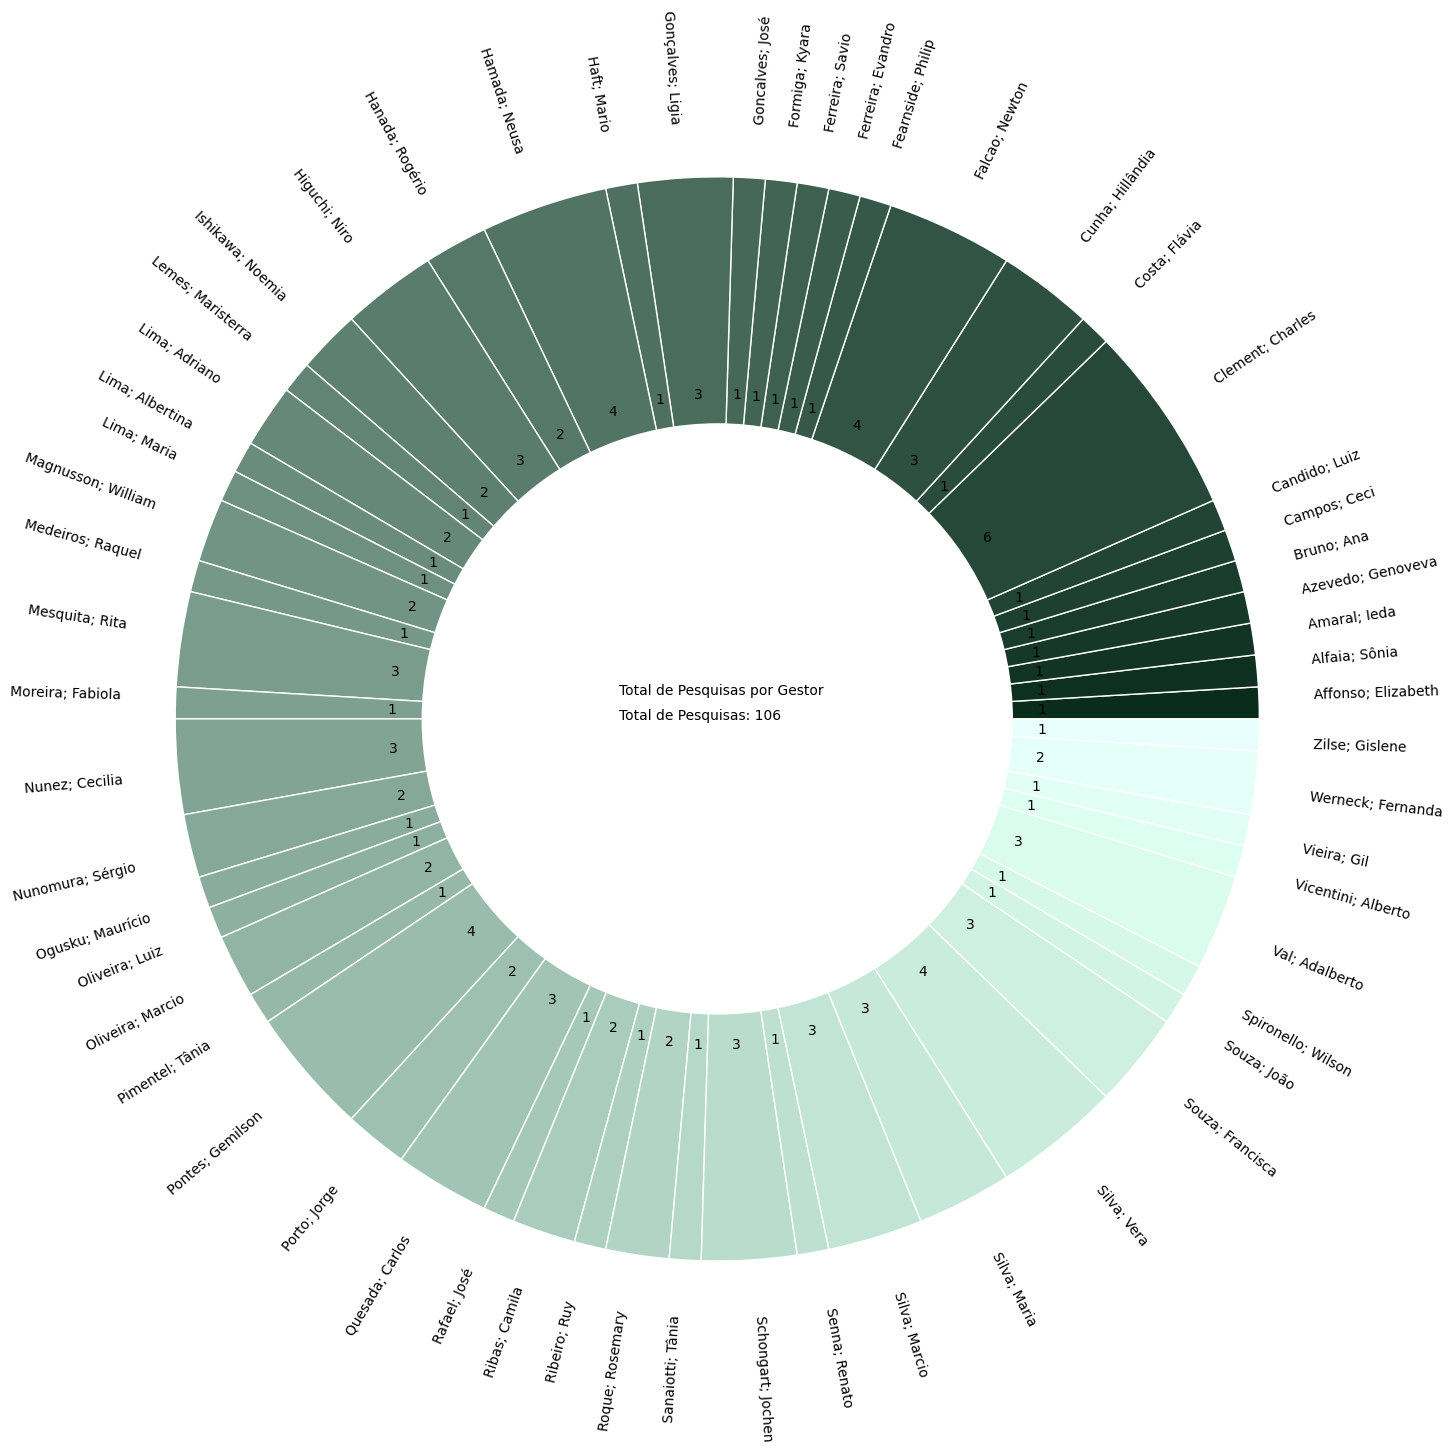

In [165]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (20,16))

# Gráfico das categorias
p1 = ax.pie(df_nome_pesq['Qnt_Pesquisa'],
            radius = 1.1,
            labels = df_nome_pesq['Gestor'],
            autopct = autopct_format(df_nome_pesq["Qnt_Pesquisa"]),
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_gestores,
            rotatelabels = True
            )

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Pesquisas: ' + str(sum(df_nome_pesq['Qnt_Pesquisa'])), xy = (-0.2, 0))
plt.annotate('Total de Pesquisas por Gestor', xy = (-0.2, 0.05))
plt.show()

## **Por Fim**

Ainda pode-se complicar mais, caso saiba-se o sistema de codificação dos projetos, agrupa-los por semlhanças no nome, etc.

Porém, ao meu ver as análises acima nos permite ter uma visão aprofundada dos dados do .csv da INPA, permitindo diversas analises diferentes sobre o início/término de projetos, sobre os gestores, sobre as Unidades. Portanto encerro aqui essa atividade.

**FIM**